In [129]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [130]:
raw_df=pd.read_csv('../data/processed/Analysis&Viz.csv')
df=raw_df.copy()

In [131]:
df.head()

,Unnamed: 0,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Diesel,Manual,First,18.20,1199.0,88.70,5,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74


In [132]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [133]:
df.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Diesel,Manual,First,18.20,1199.0,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74


## Detect The Outliers

In [134]:
df.seats.unique()

array([5, 7, 8, 4, 6, 2], dtype=int64)

In [135]:
numeric_col=df[['year','kilometers_driven','mileage','engine','power','price']]
numeric_col_no=len(numeric_col.columns)

C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\287276817.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\287276817.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\287276817.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\287276817.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\287276817.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\287276817.py:4: UserWarning: FixedFormatter should 

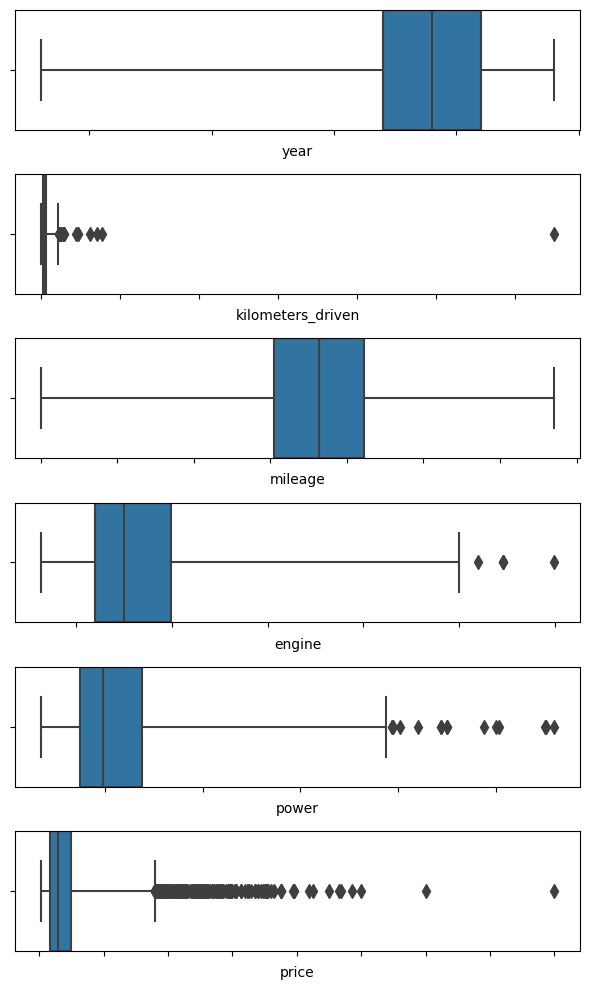

In [136]:
fig, axes = plt.subplots(numeric_col_no, 1, figsize=(numeric_col_no, 10))
for i, col in enumerate(numeric_col):
    figure=sns.boxplot(data=df, x=col, width=1, fliersize=7, whis=4, ax=axes[i])
    figure=axes[i].set_xticklabels([col])
    
plt.tight_layout()
plt.show()

## The Total Number Of Outliers 

In [137]:
out_idx=detect_outliers(df,0,numeric_col)
len(out_idx)

1067

In [147]:
for col in numeric_col:
    idx=detect_outliers(df,0,[col])
    df[col].iloc[idx]=df[col].median()

C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\802589085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[idx]=df[col].median()
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\802589085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[idx]=df[col].median()
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\802589085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[idx]=df[col].median()
C

In [148]:
out_idx=detect_outliers(df,0,numeric_col)
len(out_idx)

0

C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_10232\80400545.py:4: UserWarning: FixedFormatter should only b

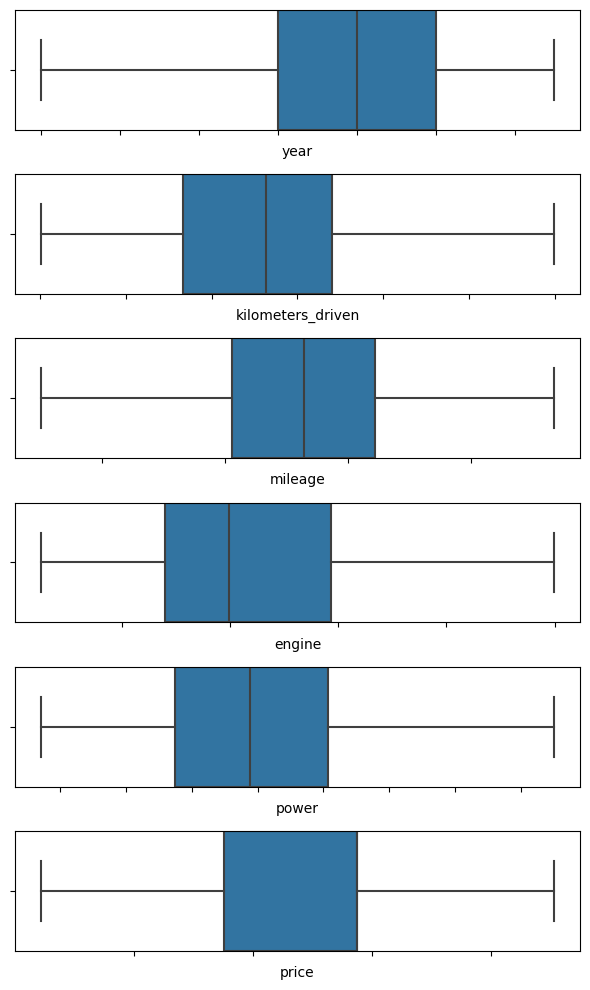

In [149]:
fig, axes = plt.subplots(numeric_col_no, 1, figsize=(numeric_col_no, 10))
for i, col in enumerate(numeric_col):
    figure=sns.boxplot(data=df, x=col, width=1, fliersize=8, whis=4, ax=axes[i])
    figure=axes[i].set_xticklabels([col])
    
plt.tight_layout()
plt.show()

## Convert The Categorical Data

In [150]:
df.drop(['name','mileage'],axis=1,inplace=True)

In [151]:
df.owner_type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [152]:
df.owner_type.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4,},inplace=True)

In [153]:
df.owner_type.unique()

array([1, 2, 4, 3], dtype=int64)

In [154]:
cat_col=df.select_dtypes('object').columns
cat_col

Index(['location', 'fuel_type', 'transmission'], dtype='object')

In [155]:
df=pd.get_dummies(df,cat_col,drop_first=True)
df.head()

,year,kilometers_driven,owner_type,engine,power,seats,price,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,fuel_type_Diesel,transmission_Manual
0,2010,72000.0,1,998.0,58.16,5,1.75,False,False,False,False,False,False,False,False,True,False,False,True
1,2015,41000.0,1,1582.0,126.20,5,5.75,False,False,False,False,False,False,False,False,False,True,True,True
2,2011,46000.0,1,1199.0,88.70,5,4.50,False,True,False,False,False,False,False,False,False,False,True,True
3,2012,87000.0,1,1248.0,88.76,7,6.00,False,True,False,False,False,False,False,False,False,False,True,True
4,2013,40670.0,2,1968.0,140.80,5,5.75,False,False,True,False,False,False,False,False,False,False,True,False


In [156]:
df.replace({True:1,False:0},inplace=True)

In [157]:
df.head()

,year,kilometers_driven,owner_type,engine,power,seats,price,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,fuel_type_Diesel,transmission_Manual
0,2010,72000.0,1,998.0,58.16,5,1.75,0,0,0,0,0,0,0,0,1,0,0,1
1,2015,41000.0,1,1582.0,126.20,5,5.75,0,0,0,0,0,0,0,0,0,1,1,1
2,2011,46000.0,1,1199.0,88.70,5,4.50,0,1,0,0,0,0,0,0,0,0,1,1
3,2012,87000.0,1,1248.0,88.76,7,6.00,0,1,0,0,0,0,0,0,0,0,1,1
4,2013,40670.0,2,1968.0,140.80,5,5.75,0,0,1,0,0,0,0,0,0,0,1,0


## Makking Train_Test_Split

In [174]:
x=df.drop('price',axis=1)
y=df['price']

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [196]:
x_train.head()

,year,kilometers_driven,owner_type,engine,power,seats,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,fuel_type_Diesel,transmission_Manual
294,2014,61726.0,1,1968.0,174.33,5,0,0,0,0,0,0,1,0,0,0,1,0
4499,2017,15000.0,1,2993.0,97.70,5,0,1,0,0,0,0,0,0,0,0,1,0
2095,2013,54884.0,2,814.0,55.20,5,0,0,1,0,0,0,0,0,0,0,1,1
1479,2014,52609.0,1,2494.0,100.60,8,0,1,0,0,0,0,0,0,0,0,1,1
797,2014,40000.0,1,998.0,67.04,5,0,0,0,0,0,0,0,1,0,0,1,1


In [197]:
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Makking The Model

In [199]:
model=LinearRegression()

In [200]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [201]:
model.score(x_train_scaled,y_train)

0.47227828950646333

In [202]:
model.score(x_test_scaled,y_test)

0.4396240315903206

# Not a good accuracy so, let's try something more better.


In [215]:
models={
    'KNN':KNeighborsRegressor(n_neighbors=3),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor()
}

In [216]:
for name,model in models.items():
    print('using:',name)
    model.fit(x_train_scaled,y_train)
    print('train accuracy: ',model.score(x_train_scaled,y_train))
    print('test accuracy: ',model.score(x_test_scaled,y_test))
    print('-'*20)

using: KNN
train accuracy:  0.7983107676356889
test accuracy:  0.6005647663350058
--------------------
using: SVR
train accuracy:  0.6834588716900543
test accuracy:  0.6575475429729759
--------------------
using: DT
train accuracy:  0.9983192297555659
test accuracy:  0.5775022429676124
--------------------


## 
> KNeighbor is better than others so lets see the last model

## We will see RandomForestRegressor

In [217]:
rf_reg = RandomForestRegressor(max_depth=5,max_leaf_nodes=50)

In [218]:
rf_reg.fit(x_train_scaled,y_train)

RandomForestRegressor(max_depth=5, max_leaf_nodes=50)

In [219]:
rf_reg.score(x_train_scaled,y_train)

0.6775744574754912

In [220]:
rf_reg.score(x_test_scaled,y_test)

0.6592656036269053

## The Best Model Is KNeighbor

In [221]:
features=x.columns.to_list()
features

['year',
 'kilometers_driven',
 'owner_type',
 'engine',
 'power',
 'seats',
 'location_Bangalore',
 'location_Chennai',
 'location_Coimbatore',
 'location_Delhi',
 'location_Hyderabad',
 'location_Jaipur',
 'location_Kochi',
 'location_Kolkata',
 'location_Mumbai',
 'location_Pune',
 'fuel_type_Diesel',
 'transmission_Manual']

In [222]:
import joblib

In [227]:
joblib.dump(model,'../models/used_cars_model.h5')

['../models/used_cars_model.h5']

In [228]:
joblib.dump(scaler,'../models/used_cars_scaler.h5')

['../models/used_cars_scaler.h5']

In [229]:
joblib.dump(features,'../models/used_cars_features.h5')

['../models/used_cars_features.h5']

In [230]:
df.to_csv('../data/processed/Preprocessing&ML.csv')